Initial model
[['B-Disease' 'O']
 ['I-Disease' 'O']
 ['I-Disease' 'O']
 ..., 
 ['B-Disease' 'O']
 ['I-Disease' 'O']
 ['O' 'O']]
[[  3481     30     35     10   1829]
 [    35    992      1      3    597]
 [    57      2   2607    206   1552]
 [     3      6    182   1690    856]
 [   257    303    349    401 109266]]
Normalized confusion matrix
[[  6.46425255e-01   5.57103064e-03   6.49953575e-03   1.85701021e-03
    3.39647168e-01]
 [  2.14987715e-02   6.09336609e-01   6.14250614e-04   1.84275184e-03
    3.66707617e-01]
 [  1.28842676e-02   4.52079566e-04   5.89285714e-01   4.65641953e-02
    3.50813743e-01]
 [  1.09609061e-03   2.19218122e-03   6.64961637e-02   6.17464377e-01
    3.12751187e-01]
 [  2.32419332e-03   2.74019679e-03   3.15620026e-03   3.62646506e-03
    9.88152945e-01]]


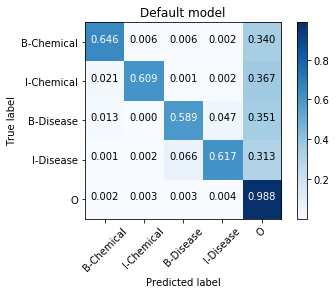

Tuned model
[['B-Disease' 'O']
 ['I-Disease' 'O']
 ['I-Disease' 'O']
 ..., 
 ['B-Disease' 'B-Disease']
 ['I-Disease' 'I-Disease']
 ['O' 'O']]
[[  3551     24     51     13   1746]
 [    48    973      1      7    599]
 [    34      0   2957    213   1220]
 [     2      5    250   1799    681]
 [   179    243    375    460 109319]]
Normalized confusion matrix
[[  6.59424327e-01   4.45682451e-03   9.47075209e-03   2.41411328e-03
    3.24233983e-01]
 [  2.94840295e-02   5.97665848e-01   6.14250614e-04   4.29975430e-03
    3.67936118e-01]
 [  7.68535262e-03   0.00000000e+00   6.68399638e-01   4.81464738e-02
    2.75768535e-01]
 [  7.30727073e-04   1.82681768e-03   9.13408842e-02   6.57289003e-01
    2.48812569e-01]
 [  1.61879612e-03   2.19758356e-03   3.39133266e-03   4.16003473e-03
    9.88632253e-01]]


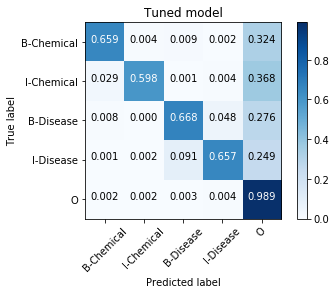

In [3]:
###########################################################################################################
# Extracting chemical-disease associations from the biological literature
# R214: Main Practical
# Jan Ondras (jo356), Trinity College
############################################################################################################
# Plot confusion matrices from testing of the named entity recogniser (NER) on BioCreative V CDR dataset
# for both: initial moodel, tuned model
############################################################################################################

import numpy as np
import matplotlib.pyplot as plt
import time
import glob
import itertools
import matplotlib
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix

classes = ['B-Chemical', 'I-Chemical', 'B-Disease', 'I-Disease', 'O'] 

# Given an array of true labels and predicted labels
def plot_cm(tl, pl, title):
    
    classesNames = classes
    #classesNames = ['N', 'B', 'S', 'I']
    if classesNames != classes:
        plt.figure(figsize=(3.,3.))
        rot = 0
    else:
        plt.figure()
        rot = 45
    
    cm = confusion_matrix(tl, pl, labels=classes) #.astype(np.float)
    print confusion_matrix(tl, pl, labels=classes)
    normalize = True
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classesNames, rotation=rot)
    plt.yticks(tick_marks, classesNames)

    fmt = '.3f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Load pairs <true label, predicted label> from testing
print "Initial model"
initModel_data = np.loadtxt('./../Dataset/initModel_testing.out', delimiter='\t', skiprows=0, dtype=str) 
print initModel_data
plot_cm(initModel_data[:,0], initModel_data[:,1], 'Default model')

print "Tuned model"
tunedModel_data = np.loadtxt('./../Dataset/tunedModel_testing.out', delimiter='\t', skiprows=0, dtype=str) 
print tunedModel_data
plot_cm(tunedModel_data[:,0], tunedModel_data[:,1], 'Tuned model')
